# Assignment - 6 Logistic Regression

# Question - Bank Full

# Import necessary libraries

In [49]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt
from sklearn import preprocessing
labelencoding = preprocessing.LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [50]:
bank = pd.read_csv(r'D:\Downloads\Bank-Full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data understanding

In [51]:
bank.shape

(45211, 17)

In [52]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [53]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [54]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Data Preparation

In [55]:
bank_data = bank.drop('y' ,axis = 1)
y = bank[['y']]

In [56]:
bank_data = pd.DataFrame(bank_data)

In [57]:
x = bank_data[['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact','month','day','poutcome']]
x

,age,job,marital,education,default,balance,housing,loan,contact,month,day,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,5,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,may,5,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,5,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,5,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,may,5,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,17,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,17,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,17,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,17,unknown


<AxesSubplot:xlabel='y', ylabel='count'>

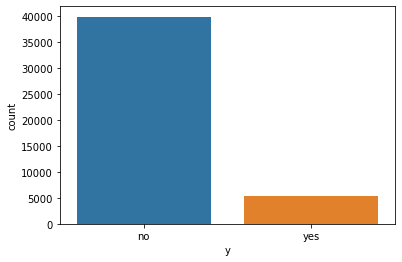

In [58]:
sns.countplot(x = 'y' ,data=y  )

<Figure size 792x792 with 0 Axes>

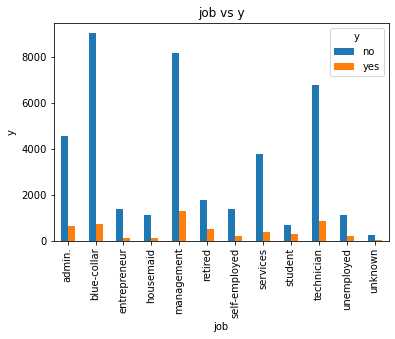

In [59]:
plt.figure(figsize = (11,11))
pd.crosstab(x.job,y.y).plot(kind = 'bar')
plt.xlabel('job')
plt.ylabel('y')
plt.title('job vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

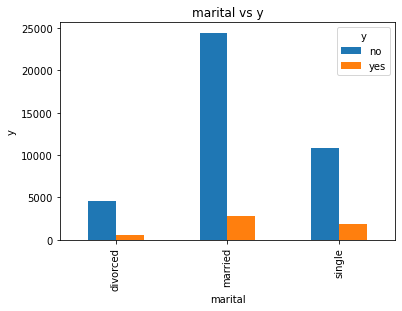

In [60]:
plt.figure(figsize =(11,11))
pd.crosstab(x.marital,y.y).plot(kind = 'bar')
plt.xlabel('marital')
plt.ylabel('y')
plt.title('marital vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

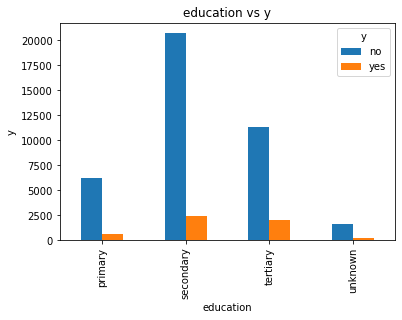

In [61]:
plt.figure(figsize =(11,11))
pd.crosstab(x.education,y.y).plot(kind = 'bar')
plt.xlabel('education')
plt.ylabel('y')
plt.title('education vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

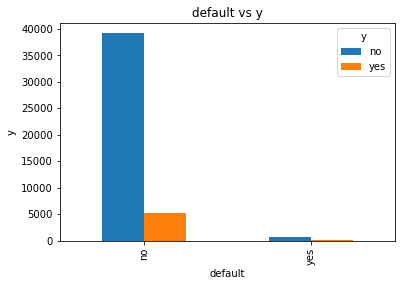

In [62]:
plt.figure(figsize =(11,11))
pd.crosstab(x.default,y.y).plot(kind = 'bar')
plt.xlabel('default')
plt.ylabel('y')
plt.title('default vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

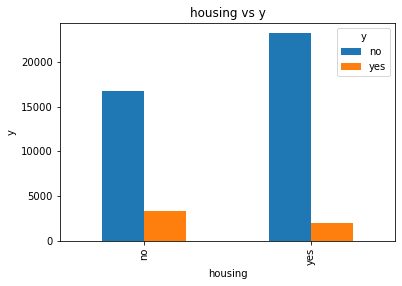

In [63]:
plt.figure(figsize =(11,11))
pd.crosstab(x.housing,y.y).plot(kind = 'bar')
plt.xlabel('housing')
plt.ylabel('y')
plt.title('housing vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

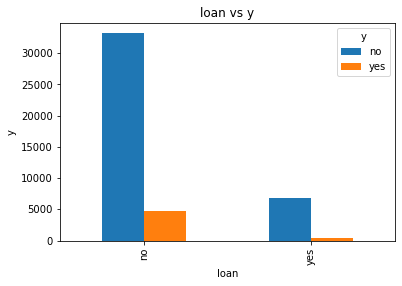

In [64]:
plt.figure(figsize =(11,11))
pd.crosstab(x.loan,y.y).plot(kind = 'bar')
plt.xlabel('loan')
plt.ylabel('y')
plt.title('loan vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

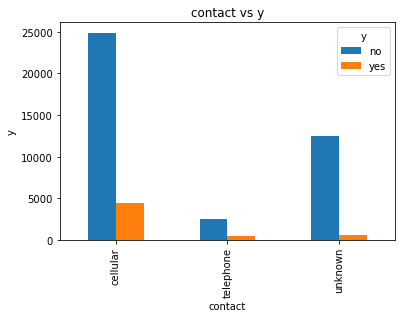

In [65]:
plt.figure(figsize =(11,11))
pd.crosstab(x.contact,y.y).plot(kind = 'bar')
plt.xlabel('contact')
plt.ylabel('y')
plt.title('contact vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

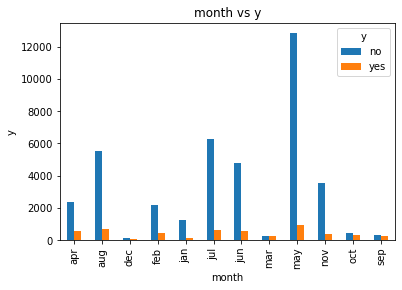

In [66]:
plt.figure(figsize =(11,11))
pd.crosstab(x.month,y.y).plot(kind = 'bar')
plt.xlabel('month')
plt.ylabel('y')
plt.title('month vs y')
plt.show()

Day can not be taken because it default based on months 

<Figure size 792x792 with 0 Axes>

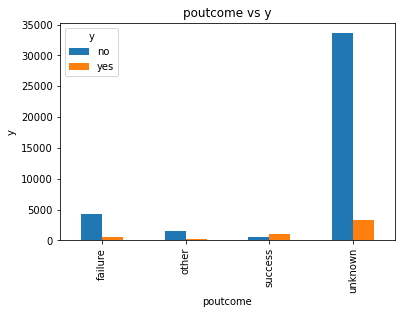

In [67]:
plt.figure(figsize =(11,11))
pd.crosstab(x.poutcome,y.y).plot(kind = 'bar')
plt.xlabel('poutcome')
plt.ylabel('y')
plt.title('poutcome vs y')
plt.show()

<Figure size 792x792 with 0 Axes>

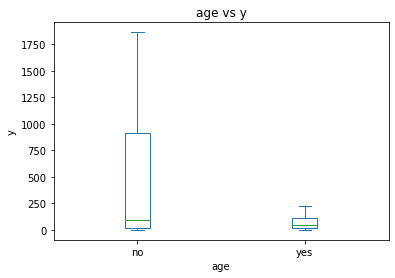

In [68]:
plt.figure(figsize =(11,11))
pd.crosstab(x.age,y.y).plot(kind = 'box')
plt.xlabel('age')
plt.ylabel('y')
plt.title('age vs y')
plt.show()

### To test for logistic regression . we are converting all the object into int 

In [69]:
x['marital']=labelencoding.fit_transform(x['marital'])

In [70]:
x['job']=labelencoding.fit_transform(x['job'])

In [71]:
x['education']=labelencoding.fit_transform(x['education'])

In [72]:
x['default']=labelencoding.fit_transform(x['default'])

In [73]:
x['housing']=labelencoding.fit_transform(x['housing'])

In [74]:
x['loan']=labelencoding.fit_transform(x['loan'])

In [75]:
x['contact']=labelencoding.fit_transform(x['contact'])

In [76]:
x['month']=labelencoding.fit_transform(x['month'])

In [77]:
x['poutcome']=labelencoding.fit_transform(x['poutcome'])

In [78]:
x

,age,job,marital,education,default,balance,housing,loan,contact,month,day,poutcome
0,58,4,1,2,0,2143,1,0,2,8,5,3
1,44,9,2,1,0,29,1,0,2,8,5,3
2,33,2,1,1,0,2,1,1,2,8,5,3
3,47,1,1,3,0,1506,1,0,2,8,5,3
4,33,11,2,3,0,1,0,0,2,8,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,9,17,3
45207,71,5,0,0,0,1729,0,0,0,9,17,3
45208,72,5,1,1,0,5715,0,0,0,9,17,2
45209,57,1,1,1,0,668,0,0,1,9,17,3


# Model Building

In [79]:
x.shape,y.shape

((45211, 12), (45211, 1))

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state=12 , shuffle= True)

In [81]:
x_train.shape,y_train.shape

((36168, 12), (36168, 1))

In [82]:
x_test.shape,y_test.shape

((9043, 12), (9043, 1))

# Model Training

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
training = LogisticRegression()
training.fit(x_train,y_train)
training.coef_

array([[-1.31277930e-03, -5.78941233e-02, -9.95877250e-02,
         9.58009892e-02, -2.28758158e-02,  3.02402293e-05,
        -7.03359813e-01, -2.51441727e-01, -7.02920254e-01,
         1.02203099e-02, -1.41918287e-02, -2.98507568e-01]])

# Model Testing / Model Evalution

### 1) Training Accuracy

In [85]:
from sklearn.metrics import accuracy_score
training1 = training.predict(x_train)
accuracy_score(y_train,training1)

0.8825204600752046

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,training1)

array([[31914,    15],
       [ 4234,     5]], dtype=int64)

In [110]:
from sklearn.metrics import classification_report
aprint(classification_report(y_train,training1))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     31929
         yes       0.25      0.00      0.00      4239

    accuracy                           0.88     36168
   macro avg       0.57      0.50      0.47     36168
weighted avg       0.81      0.88      0.83     36168



### 2) Testing Accuracy

In [129]:
testing = training.predict(x_test)
accuracy_score(y_test,testing )

0.883777507464337

In [130]:
confusion_matrix(y_test,testing)

array([[7991,    2],
       [1049,    1]], dtype=int64)

In [132]:
print(classification_report(y_test,testing))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7993
         yes       0.33      0.00      0.00      1050

    accuracy                           0.88      9043
   macro avg       0.61      0.50      0.47      9043
weighted avg       0.82      0.88      0.83      9043



In [ ]:
Training accuracy and Testing accuracy are equal

# Model optimization techniques

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaler_x = std_scaler.fit_transform(x)
scaler_x

array([[ 1.60696496, -0.10381968, -0.27576178, ...,  0.82377336,
        -1.29847633,  0.44489814],
       [ 0.28852927,  1.42400783,  1.3683719 , ...,  0.82377336,
        -1.29847633,  0.44489814],
       [-0.74738448, -0.71495069, -0.27576178, ...,  0.82377336,
        -1.29847633,  0.44489814],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.15634426,
         0.14341818, -0.56617504],
       [ 1.51279098, -1.02051619, -0.27576178, ...,  1.15634426,
         0.14341818,  0.44489814],
       [-0.37068857, -0.71495069, -0.27576178, ...,  1.15634426,
         0.14341818, -1.57724822]])

In [42]:
x_train,x_test,y_train,y_test = train_test_split(scaler_x,y,test_size=0.20,random_state=12)

In [44]:
training.fit(x_train,y_train)

LogisticRegression()

In [45]:
%%time
y_pred_train = training.predict(x_train)
accuracy_score(y_train,y_pred_train)

CPU times: total: 734 ms
Wall time: 225 ms


0.8826863525768636

In [46]:
%%time
y_pred_test = training.predict(x_test)
accuracy_score(y_test,y_pred_test)

CPU times: total: 172 ms
Wall time: 37.5 ms


0.8838880902355413

# Model Testing / Model Evaluation

### 1) Training Accuracy

In [92]:
training3 = training.predict(x_train)
accuracy_score(y_train,training3)

0.8825204600752046

In [107]:
confusion_matrix(y_train,y_pred_train)

array([[31924,     5],
       [ 4238,     1]], dtype=int64)

In [108]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     31929
         yes       0.17      0.00      0.00      4239

    accuracy                           0.88     36168
   macro avg       0.52      0.50      0.47     36168
weighted avg       0.80      0.88      0.83     36168



In [113]:
confusion_matrix(y_test,y_pred_test)

array([[7992,    1],
       [1049,    1]], dtype=int64)

In [115]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7993
         yes       0.50      0.00      0.00      1050

    accuracy                           0.88      9043
   macro avg       0.69      0.50      0.47      9043
weighted avg       0.84      0.88      0.83      9043

